In [1]:
# import kaggle

# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('elvis23/mental-health-conversational-data', path='.', unzip=True)
# # kaggle.api.dataset_download_files('xmaulana/psychikadataset-7b', path='.', unzip=True)

In [2]:
import json
import pandas as pd

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,greeting,Hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,greeting,Ada orang di sana?,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,greeting,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
...,...,...,...
226,fact-29,Bagaimana saya tahu jika saya sedang tidak sehat?,"[Jika keyakinan, pikiran, perasaan, atau peril..."
227,fact-30,Bagaimana saya bisa menjaga koneksi sosial? Ba...,"[Banyak orang merasa sendirian sekarang, tetap..."
228,fact-31,Apa perbedaan antara kecemasan dan stres?,[Stres dan kecemasan sering digunakan secara b...
229,fact-32,Apa perbedaan antara kesedihan dan depresi?,[Kesedihan adalah reaksi normal terhadap kehil...


In [4]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

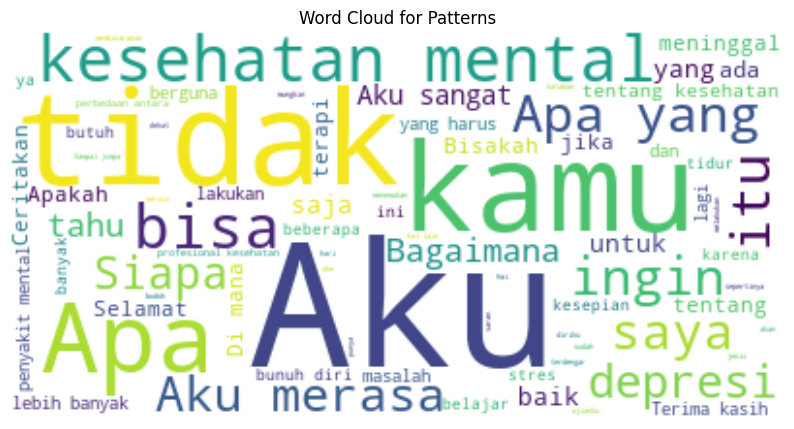

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

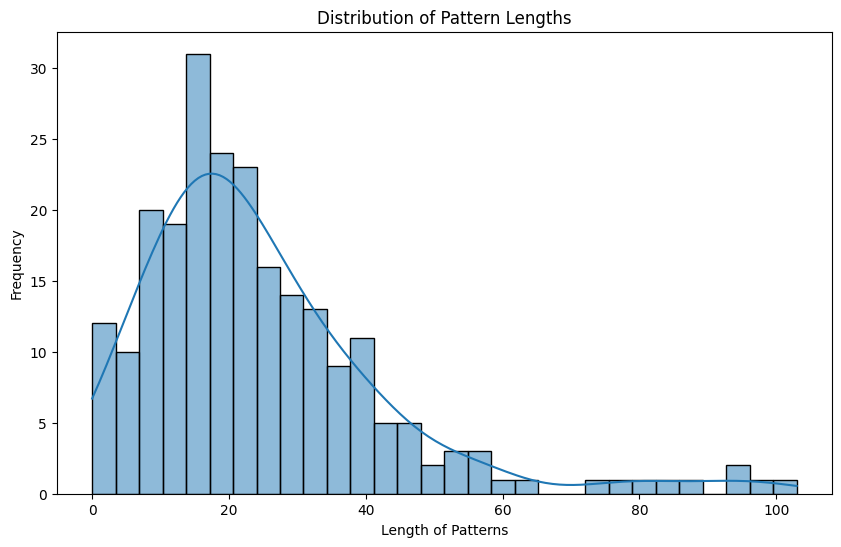

In [6]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

In [7]:
import re

def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s) 
    s = s.lower()
    s = s.split()
    s = " ".join(s)
    return s

df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
1,greeting,hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
2,greeting,ada orang di sana,[Halo. Ceritakan bagaimana perasaanmu hari ini...,18
3,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
4,greeting,halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...,4
...,...,...,...,...
226,fact,bagaimana saya tahu jika saya sedang tidak sehat,"[Jika keyakinan, pikiran, perasaan, atau peril...",49
227,fact,bagaimana saya bisa menjaga koneksi sosial bag...,"[Banyak orang merasa sendirian sekarang, tetap...",80
228,fact,apa perbedaan antara kecemasan dan stres,[Stres dan kecemasan sering digunakan secara b...,41
229,fact,apa perbedaan antara kesedihan dan depresi,[Kesedihan adalah reaksi normal terhadap kehil...,43


In [8]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

In [9]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

In [10]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'pandora useful', 'user advice',
       'learn mental health', 'mental health fact', 'fact'], dtype=object)

In [11]:
len(df['tag'].unique())

50

# PRE PROCESSING INDO

In [12]:
import numpy as np
import pandas as pd
import nltk
import random
import json
import re
import string
import itertools

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# 2. Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. Load your intents.json
with open("intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 4. Flatten data
rows = []
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent["patterns"]
    responses = intent["responses"]

    for pattern in patterns:
        for response in responses:
            rows.append({
                "intent": tag,
                "pattern": pattern,
                "response": response
            })

df = pd.DataFrame(rows)

# 5. Text preprocessing function
def preprocess_text(text):
    text = text.lower()                            # lowercase
    text = re.sub(r"[^\w\s]", " ", text)           # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    text = ' '.join(words)
    stemmed = stemmer.stem(text)                   # stemming
    return stemmed.strip()

# 6. Apply preprocessing
df["pattern_clean"] = df["pattern"].apply(preprocess_text)
df["response_clean"] = df["response"].apply(preprocess_text)

# 7. Show result
print(df[["intent", "pattern", "pattern_clean", "response_clean"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     intent pattern pattern_clean           response_clean
0  greeting     Hai           hai          halo cerita asa
1  greeting     Hai           hai                 hai bawa
2  greeting     Hai           hai                  hai asa
3  greeting     Hai           hai         senang lihat asa
4  greeting     Hai           hai  halo senang lihat dunia


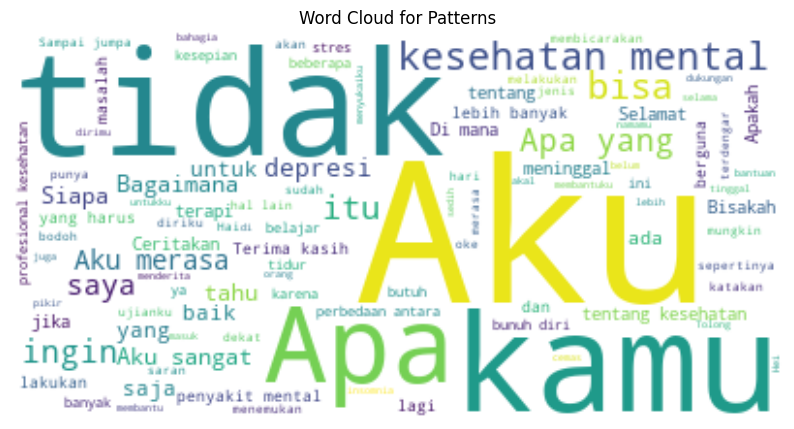

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

In [16]:
X = df['pattern_clean']
y = df['intent']

# Build Model

# cendol


In [17]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained("cahya/gpt2-small-indonesian-522M")
model = AutoModelForCausalLM.from_pretrained("cahya/gpt2-small-indonesian-522M")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer.pad_token = tokenizer.eos_token  # GPT2 has no pad_token by default
model.resize_token_embeddings(len(tokenizer))
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [18]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [19]:
df['input_text'] = "Tentukan intent dari kalimat berikut: " + df['pattern_clean']
df['target_text'] = df['intent']


In [20]:
from torch.utils.data import Dataset

MAX_INPUT_LENGTH = 128
MAX_TARGET_LENGTH = 16

class IntentDataset(Dataset):
    def __init__(self, input_texts, target_texts, tokenizer):
        self.input_texts = input_texts
        self.target_texts = target_texts
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.input_texts)

    def __getitem__(self, idx):
        input_enc = self.tokenizer(self.input_texts[idx],
                                   padding="max_length",
                                   truncation=True,
                                   max_length=MAX_INPUT_LENGTH,
                                   return_tensors="pt")
        target_enc = self.tokenizer(self.target_texts[idx],
                                    padding="max_length",
                                    truncation=True,
                                    max_length=MAX_TARGET_LENGTH,
                                    return_tensors="pt")

        input_ids = input_enc.input_ids.squeeze()
        attention_mask = input_enc.attention_mask.squeeze()
        labels = target_enc.input_ids.squeeze()
        labels[labels == tokenizer.pad_token_id] = -100

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }


In [21]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# from torch.utils.data import Dataset

# MODEL_ID = "indonlp/cendol-mt5-small-inst"
# tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
# model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_ID)

# MAX_INPUT_LENGTH = 128
# MAX_TARGET_LENGTH = 16

# class IntentDataset(Dataset):
#     def __init__(self, input_texts, target_texts, tokenizer):
#         self.input_texts = input_texts
#         self.target_texts = target_texts
#         self.tokenizer = tokenizer

#     def __len__(self):
#         return len(self.input_texts)

#     def __getitem__(self, idx):
#         input_enc = tokenizer(self.input_texts[idx], 
#                               padding="max_length", 
#                               truncation=True,
#                               max_length=MAX_INPUT_LENGTH,
#                               return_tensors="pt")
#         target_enc = tokenizer(self.target_texts[idx], 
#                                padding="max_length", 
#                                truncation=True,
#                                max_length=MAX_TARGET_LENGTH,
#                                return_tensors="pt")

#         input_ids = input_enc.input_ids.squeeze()
#         attention_mask = input_enc.attention_mask.squeeze()
#         labels = target_enc.input_ids.squeeze()
#         labels[labels == tokenizer.pad_token_id] = -100  # ignore padding in loss

#         return {
#             "input_ids": input_ids,
#             "attention_mask": attention_mask,
#             "labels": labels
#         }


In [22]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["input_text"].tolist(),
    df["target_text"].tolist(),
    test_size=0.1,
    random_state=42
)

# Buat Dataset
train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
val_dataset = IntentDataset(val_texts, val_labels, tokenizer)

# Buat DataLoader
BATCH_SIZE = 16
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=data_collator)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=data_collator)


In [23]:
# from sklearn.model_selection import train_test_split

# train_texts, val_texts, train_labels, val_labels = train_test_split(
#     df["input_text"].tolist(), df["target_text"].tolist(), test_size=0.1, random_state=42)

# train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
# val_dataset = IntentDataset(val_texts, val_labels, tokenizer)


In [26]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from torch.utils.data import Dataset, DataLoader
import torch
from torch.optim import AdamW

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('cahya/gpt2-small-indonesian-522M')
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained('cahya/gpt2-small-indonesian-522M')
model.resize_token_embeddings(len(tokenizer))

# ✅ FIXED Dataset for sequence-to-sequence with GPT-2
class IntentDataset(Dataset):
    def __init__(self, input_texts, target_texts, tokenizer, max_length=144):
        self.input_texts = input_texts
        self.target_texts = target_texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_texts)

    def __getitem__(self, idx):
        # ✅ Combine input and target for causal LM training
        # Format: "Input: [input_text] Output: [target_text]"
        combined_text = f"Input: {self.input_texts[idx]} Output: {self.target_texts[idx]}{self.tokenizer.eos_token}"
        
        # Tokenize the combined text
        encoding = self.tokenizer(
            combined_text,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        
        input_ids = encoding.input_ids.squeeze()
        attention_mask = encoding.attention_mask.squeeze()
        
        # ✅ For causal LM, labels = input_ids (the model learns to predict next token)
        labels = input_ids.clone()
        
        # ✅ Optional: Mask the input part so model only learns to generate the output
        input_part = f"Input: {self.input_texts[idx]} Output: "
        input_tokens = self.tokenizer(input_part, add_special_tokens=False)["input_ids"]
        input_length = len(input_tokens)
        
        # Mask input tokens (set to -100 so they're ignored in loss calculation)
        if input_length < len(labels):
            labels[:input_length] = -100
        
        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": labels
        }

# ✅ Simple collate function (DataCollatorWithPadding should work, but let's be explicit)
def collate_fn(batch):
    input_ids = torch.stack([item["input_ids"] for item in batch])
    attention_mask = torch.stack([item["attention_mask"] for item in batch])
    labels = torch.stack([item["labels"] for item in batch])
    
    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "labels": labels
    }

# Create datasets with the fixed class
train_dataset = IntentDataset(train_texts, train_labels, tokenizer)
val_dataset = IntentDataset(val_texts, val_labels, tokenizer)

# Create dataloaders
BATCH_SIZE = 8  # Reduced for memory efficiency
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

# Training setup
optimizer = AdamW(model.parameters(), lr=2e-5)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs = 30
patience = 5
best_val_loss = float('inf')
patience_counter = 0

print(f"Using device: {device}")
print(f"Model loaded with {sum(p.numel() for p in model.parameters())} parameters")

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    for batch_idx, batch in enumerate(train_dataloader):
        b_input_ids = batch["input_ids"].to(device)
        b_input_mask = batch["attention_mask"].to(device)
        b_labels = batch["labels"].to(device)
        
        # Debug first batch
        if batch_idx == 0 and epoch == 0:
            print(f"✅ Input IDs shape: {b_input_ids.shape}")
            print(f"✅ Labels shape: {b_labels.shape}")
            print(f"✅ Sample input: {tokenizer.decode(b_input_ids[0], skip_special_tokens=False)}")

        model.zero_grad()
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
    avg_train_loss = total_loss / len(train_dataloader)

    # VALIDATION
    model.eval()
    val_loss = 0
    sample_generations = []

    with torch.no_grad():
        for batch_idx, batch in enumerate(val_dataloader):
            b_input_ids = batch["input_ids"].to(device)
            b_input_mask = batch["attention_mask"].to(device)
            b_labels = batch["labels"].to(device)

            outputs = model(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                labels=b_labels
            )
            val_loss += outputs.loss.item()

            # Generate samples from first batch
            if batch_idx == 0 and epoch % 5 == 0:
                # Create input prompt for generation
                sample_input = f"Input: {val_texts[0]} Output: "
                input_ids = tokenizer(sample_input, return_tensors="pt").input_ids.to(device)
                
                generated_ids = model.generate(
                    input_ids=input_ids,
                    max_length=input_ids.shape[1] + 32,
                    do_sample=True,
                    temperature=0.7,
                    top_p=0.9,
                    pad_token_id=tokenizer.pad_token_id,
                    eos_token_id=tokenizer.eos_token_id
                )
                
                generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
                sample_generations.append({
                    'input': val_texts[0],
                    'expected': val_labels[0],
                    'generated': generated_text
                })

    avg_val_loss = val_loss / len(val_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
    # Show sample generations
    if epoch % 5 == 0 and sample_generations:
        print("\n--- Sample Generation ---")
        gen = sample_generations[0]
        print(f"Input: {gen['input']}")
        print(f"Expected: {gen['expected']}")
        print(f"Generated: {gen['generated']}")
        print("-" * 50)

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pt")
        print(f"✅ New best model saved with val loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

print("Training completed!")

# ✅ Function to use the trained model for inference
def generate_response(input_text, model, tokenizer, max_new_tokens=32):
    model.eval()
    prompt = f"Input: {input_text} Output: "
    
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=input_ids,
            max_length=input_ids.shape[1] + max_new_tokens,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
    
    generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
    # Extract only the output part
    output_part = generated_text.split("Output: ")[-1]
    return output_part

# Example usage after training:
# response = generate_response("Hello, how are you?", model, tokenizer)

Using device: cpu
Model loaded with 124439808 parameters
✅ Input IDs shape: torch.Size([8, 144])
✅ Labels shape: torch.Size([8, 144])
✅ Sample input: Input: Tentukan intent dari kalimat berikut: selamat jalan Output: goodbye<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endofte

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Epoch 1, Train Loss: 0.2926, Val Loss: 0.0101

--- Sample Generation ---
Input: Tentukan intent dari kalimat berikut: terapi
Expected: fact-7
Generated: Input: Tentukan intent dari kalimat berikut: terapi Output: 
--------------------------------------------------
✅ New best model saved with val loss: 0.0101
Epoch 2, Train Loss: 0.0091, Val Loss: 0.0068
✅ New best model saved with val loss: 0.0068
Epoch 3, Train Loss: 0.0049, Val Loss: 0.0094
Epoch 4, Train Loss: 0.0043, Val Loss: 0.0069
Epoch 5, Train Loss: 0.0036, Val Loss: 0.0067
✅ New best model saved with val loss: 0.0067
Epoch 6, Train Loss: 0.0029, Val Loss: 0.0064

--- Sample Generation ---
Input: Tentukan intent dari kalimat berikut: terapi
Expected: fact-7
Generated: Input: Tentukan intent dari kalimat berikut: terapi Output: 
--------------------------------------------------
✅ New best model saved with val loss: 0.0064
Epoch 7, Train Loss: 0.0026, Val Loss: 0.0067
Epoch 8, Train Loss: 0.0024, Val Loss: 0.0054
✅ New best mod

In [27]:
# from transformers import AutoTokenizer, AutoModelForCausalLM
# from sklearn.metrics import accuracy_score
# import torch
# from torch.optim import AdamW
# from torch.utils.data import DataLoader

# # ✅ Load tokenizer first
# tokenizer = AutoTokenizer.from_pretrained('cahya/gpt2-small-indonesian-522M')

# # ✅ Add pad_token manually (GPT2 doesn't have one)
# tokenizer.pad_token = tokenizer.eos_token

# # ✅ Load model and resize embeddings AFTER setting pad_token
# model = AutoModelForCausalLM.from_pretrained('cahya/gpt2-small-indonesian-522M')
# model.resize_token_embeddings(len(tokenizer))

# def tokenize_function(example):
#     # ❌ DON'T use return_tensors="pt" in tokenize_function for datasets
#     # This causes issues with batching in DataLoader
#     tokenized = tokenizer(
#         example["text"],
#         padding="max_length",
#         truncation=True,
#         max_length=64,
#         # return_tensors="pt"  # Remove this line
#     )
    
#     # ✅ For causal language modeling, labels = input_ids
#     tokenized["labels"] = tokenized["input_ids"].copy()  # Use .copy() instead of .clone()
    
#     return tokenized

# # ✅ Custom collate function to handle batching properly
# def collate_fn(batch):
#     # Convert lists to tensors
#     input_ids = torch.tensor([item["input_ids"] for item in batch])
#     attention_mask = torch.tensor([item["attention_mask"] for item in batch])
#     labels = torch.tensor([item["labels"] for item in batch])
    
#     return {
#         "input_ids": input_ids,
#         "attention_mask": attention_mask,
#         "labels": labels
#     }

# def tokenize_function(example):
#     # ❌ DON'T use return_tensors="pt" in tokenize_function for datasets
#     # This causes issues with batching in DataLoader
#     tokenized = tokenizer(
#         example["text"],
#         padding="max_length",
#         truncation=True,
#         max_length=64,
#         # return_tensors="pt"  # Remove this line
#     )
    
#     # ✅ For causal language modeling, labels = input_ids
#     tokenized["labels"] = tokenized["input_ids"].copy()  # Use .copy() instead of .clone()
    
#     return tokenized

# # ✅ Make sure to use the custom collate_fn when creating DataLoaders
# # train_dataloader = DataLoader(train_dataset, batch_size=your_batch_size, collate_fn=collate_fn)
# # val_dataloader = DataLoader(val_dataset, batch_size=your_batch_size, collate_fn=collate_fn)

# optimizer = AdamW(model.parameters(), lr=2e-5)

# epochs = 30
# patience = 5
# best_val_loss = float('inf')
# patience_counter = 0

# # ✅ Make sure device is defined
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# print(f"Using device: {device}")
# print(f"Model loaded with {sum(p.numel() for p in model.parameters())} parameters")

# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
    
#     for batch in train_dataloader:
#         # ✅ Debug batch shapes
#         print(f"Input IDs shape: {batch['input_ids'].shape}")
#         print(f"Labels shape: {batch['labels'].shape}")
        
#         b_input_ids = batch["input_ids"].to(device)
#         b_input_mask = batch["attention_mask"].to(device)
#         b_labels = batch["labels"].to(device)
        
#         # ✅ Ensure shapes match
#         assert b_input_ids.shape == b_labels.shape, f"Shape mismatch: {b_input_ids.shape} vs {b_labels.shape}"

#         model.zero_grad()
#         outputs = model(
#             input_ids=b_input_ids,
#             attention_mask=b_input_mask,
#             labels=b_labels
#         )
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
        
#     avg_train_loss = total_loss / len(train_dataloader)

#     # VALIDATION
#     model.eval()
#     val_loss = 0
#     generated_texts = []
#     reference_texts = []

#     with torch.no_grad():
#         for batch in val_dataloader:
#             b_input_ids = batch["input_ids"].to(device)
#             b_input_mask = batch["attention_mask"].to(device)
#             b_labels = batch["labels"].to(device)

#             outputs = model(
#                 input_ids=b_input_ids,
#                 attention_mask=b_input_mask,
#                 labels=b_labels
#             )
#             val_loss += outputs.loss.item()

#             # GENERATE OUTPUTS
#             generated_ids = model.generate(
#                 input_ids=b_input_ids,
#                 attention_mask=b_input_mask,
#                 max_length=b_input_ids.shape[1] + 20,  # ✅ Generate beyond input length
#                 do_sample=True,
#                 temperature=0.9,
#                 top_p=0.95,
#                 top_k=50,
#                 pad_token_id=tokenizer.pad_token_id,
#                 eos_token_id=tokenizer.eos_token_id
#             )

#             # ✅ Decode only the generated part
#             generated_texts_batch = []
#             reference_texts_batch = []
            
#             for i in range(generated_ids.shape[0]):
#                 # ✅ Fix: input_length should be the sequence length, not tensor shape
#                 input_length = b_input_ids.shape[1]  # This is the sequence length
                
#                 # Generated text (excluding input)
#                 generated_text = tokenizer.decode(
#                     generated_ids[i][input_length:], 
#                     skip_special_tokens=True
#                 )
                
#                 # Reference text (handle -100 labels)
#                 labels_for_decode = b_labels[i].clone()
#                 labels_for_decode[labels_for_decode == -100] = tokenizer.pad_token_id
#                 reference_text = tokenizer.decode(
#                     labels_for_decode, 
#                     skip_special_tokens=True
#                 )
                
#                 generated_texts_batch.append(generated_text)
#                 reference_texts_batch.append(reference_text)
            
#             generated_texts.extend(generated_texts_batch)
#             reference_texts.extend(reference_texts_batch)

#     avg_val_loss = val_loss / len(val_dataloader)
#     print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    
#     # Show some examples
#     if epoch % 5 == 0:
#         print("\n--- Sample Generations ---")
#         for i in range(min(3, len(generated_texts))):
#             print(f"Generated: {generated_texts[i][:100]}...")
#             print(f"Reference: {reference_texts[i][:100]}...")
#             print("-" * 50)

#     # EARLY STOPPING
#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss
#         patience_counter = 0
#         torch.save(model.state_dict(), "best_model.pt")
#         print(f"✅ New best model saved with val loss: {best_val_loss:.4f}")
#     else:
#         patience_counter += 1
#         if patience_counter >= patience:
#             print("Early stopping triggered.")
#             break

# print("Training completed!")

In [39]:
import numpy as np

def preprocess_text(text):
    # contoh sederhana
    return text.lower().strip()

def encode_texts(texts):
    enc = tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=MAX_INPUT_LENGTH,
        return_tensors="pt"
    )
    return enc.input_ids, enc.attention_mask

def predict_intent(text):
    model.eval()
    cleaned = preprocess_text(text)
    input_text = "Tentukan intent dari kalimat berikut: " + cleaned
    input_enc = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=MAX_INPUT_LENGTH).to(device)

    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=input_enc.input_ids,
            attention_mask=input_enc.attention_mask,
            max_length=8
        )

    preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    intent = preds[0].strip()

    # print(f"[DEBUG] Predicted intent: '{intent}'")

    responses = df[df['intent'] == intent]['response'].values
    if len(responses) > 0:
        response = np.random.choice(responses)
    else:
        response = "Maaf, saya tidak mengerti maksud Anda."

    return intent, response

print("TanyaRasa Chatbot (type 'quit' to exit)")
while True:
    user_input = input("You: ")
    if user_input.lower() == "quit":
        print("Chatbot: Sampai jumpa!")
        break
    intent, response = predict_intent(user_input)
    print(f"User ({intent}): {user_input}")
    print(f"Chatbot ({intent}): {response}")


TanyaRasa Chatbot (type 'quit' to exit)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ValueError: Input length of input_ids is 9, but `max_length` is set to 8. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Asumsi all_preds dan all_labels sudah berupa list string label (intent)

acc = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {acc:.4f}")

print("Classification Report:")
print(classification_report(all_labels, all_preds, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Perplexity (jika val_loss sudah dihitung)
avg_val_loss = val_loss / len(val_dataloader)
perplexity = np.exp(avg_val_loss)
print(f"Validation Perplexity: {perplexity:.4f}")


Validation Accuracy: 0.6061
Classification Report:
                          precision    recall  f1-score   support

                   about       0.50      0.33      0.40         3
                  casual       1.00      0.83      0.91         6
                   death       0.67      1.00      0.80         2
                 default       1.00      0.60      0.75         5
               depressed       1.00      1.00      1.00         1
                    done       0.00      0.00      0.00         0
                  fact-1       0.00      0.00      0.00         1
                  fact-2       0.00      0.00      0.00         0
                 fact-22       0.00      0.00      0.00         1
                 fact-23       0.00      0.00      0.00         1
                 fact-29       0.00      0.00      0.00         1
                  fact-7       0.44      1.00      0.62         4
                 friends       0.00      0.00      0.00         0
                 goodbye